In [1]:
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import itertools
from IPython.display import Markdown, display,Image,HTML
from sympy import divisors,divisor_count,factorint
from matplotlib.patches import Rectangle

Show Solution The perimeter of a 10-by-10 square field is surrounded by lasers pointing into the field. (Each laser begins half a unit from the edge of the field, as indicated by the •’s.) Some of the lasers have numbers beside them. Place diagonal mirrors in some of the cells so that the product of the segment lengths of a laser’s path matches the clue numbers. (For instance, the segments for the “75” path in the example puzzle have lengths 5, 3, 5.) Mirrors may not be placed in orthogonally adjacent cells. Once finished, determine the missing clue numbers for the perimeter, and calculate the sum of these clues for each side of the square. The answer to this puzzle is the product of these four sums

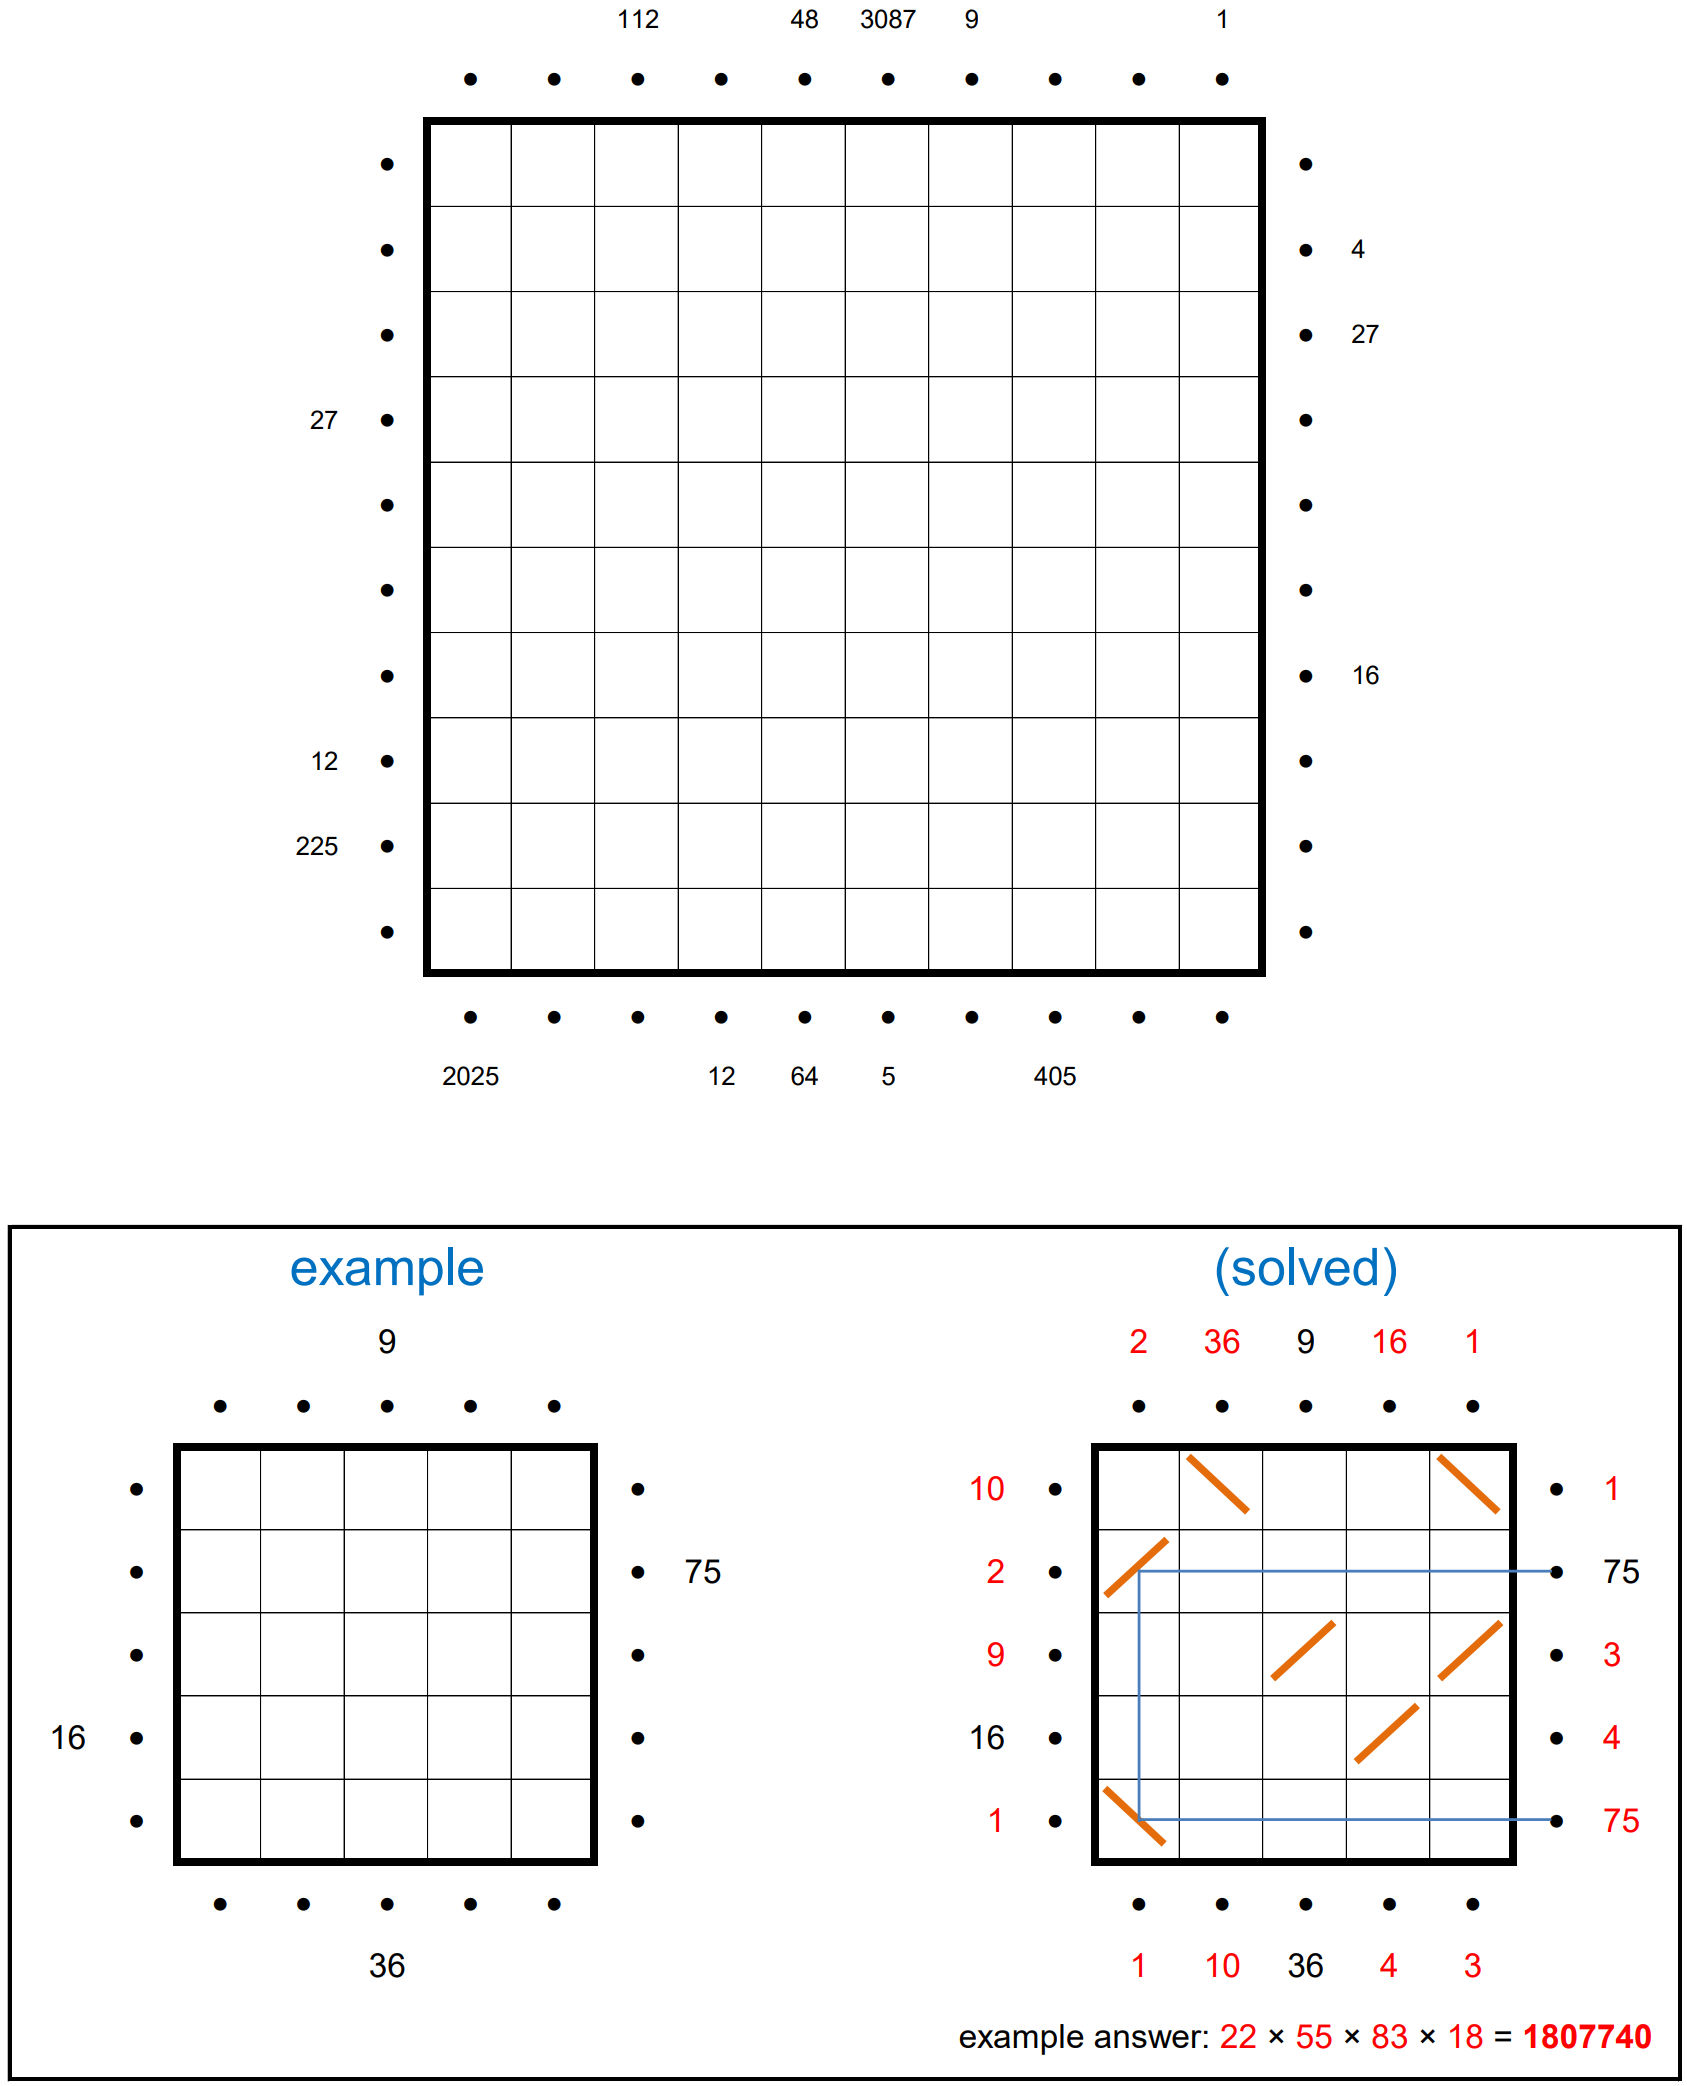

In [2]:
url='https://www.janestreet.com/puzzles/hall-of-mirrors-3-index/'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
x =[text for text in soup.body.stripped_strings]
#display([(i,j) for i,j in enumerate(x)])
display(Markdown(" ".join(x[15:26])))
display(Image('https://www.janestreet.com/puzzles/mirrors_3.png',width=400))

In [3]:
def sol_print(solution,a,b,c,d):

    top =[0,0,112,0,48,3087,9,0,0,1]
    lhs =[0,0,0,27,0,0,0,12,225,0]
    bot =[2025,0,0,12,64,5,0,405,0,0]
    rhs =[0,4,27,0,0,0,16,0,0,0]
    
    n = solution.shape[0]
    frame = np.zeros((n+2,n+2))
    frame[0,1:n+1]= top
    frame[1:n+1,0]= lhs
    frame[n+1,1:n+1]= bot
    frame[1:n+1,n+1]= rhs
    out =np.array(frame).astype('int').astype('str')
    out[out=="0"] = ""

    x = np.array(solution).astype('int').astype('str')
    x[x=="0"] = ""
    x[x=="1"] = "\\"
    x[x=="2"] = "/"
    x[x=="3"] = ""
    x[x=="4"] = ""
    x[x=="5"] = ""
    x[x=="6"] = ""
    x[x=="7"] = ""
    out[1:n+1,1:n+1]=x
         
    y =np.zeros((n+2,n+2))
    fig,ax = plt.subplots(1,2,figsize=(10,5))
    ax[0] = sns.heatmap(y,annot=out,cbar=False,cmap="Blues",fmt="",linecolor='w',alpha = .6,annot_kws={"fontsize":10},ax=ax[0])
    for i in range(1,n+1):
        for j in range(1,n+1):
            ax[0].add_patch(Rectangle((i,j), 1, 1, fill=False, edgecolor='k', lw=1))
    ax[0].axis("off")

    frame2 = np.zeros((n+2,n+2))
    frame2[0,1:n+1]=a
    frame2[1:n+1,0]=b
    frame2[n+1,1:n+1]=c
    frame2[1:n+1,n+1]=d
    out2 =np.array(frame2).astype('int').astype('str')
    out2[out=="0"] = ""
    x = np.array(solution).astype('int').astype('str')
    x[x=="0"] = ""
    x[x=="1"] = "\\"
    x[x=="2"] = "/"
    x[x=="3"] = "x"
    x[x=="4"] = "."
    x[x=="5"] = "*"
    x[x=="6"] = "+"
    x[x=="7"] = "o"
    out[1:n+1,1:n+1]=x
    
    out2[1:n+1,1:n+1]=x
    ax[1] = sns.heatmap(y,annot=out2,cbar=False,cmap="Blues",fmt="",linecolor='w',alpha = .6,annot_kws={"fontsize":10},ax=ax[1] )
    for i in range(1,n+1):
        for j in range(1,n+1):
            ax[1].add_patch(Rectangle((i,j), 1, 1, fill=False, edgecolor='k', lw=1))
    ax[1].axis("off")

    top_miss = [i if top[e] == 0 else 0 for e,i in enumerate(a) ]
    lhs_miss =[i if lhs[e] == 0 else 0 for e,i in enumerate(b) ]
    bot_miss =[i if bot[e] == 0 else 0 for e,i in enumerate(c) ]
    rhs_miss =[i if rhs[e] == 0 else 0 for e,i in enumerate(d) ]

    print(top,a,top_miss,sum(top_miss))
    print(lhs,b,lhs_miss,sum(lhs_miss))
    print(rhs,c,rhs_miss,sum(rhs_miss))
    print(bot,d,bot_miss,sum(bot_miss))

    print("Answer: {:,.0f}".format(sum(top_miss)*sum(lhs_miss)*sum(rhs_miss)*sum(bot_miss)))
    
    plt.tight_layout()
    plt.show()
  

In [4]:
def path(x,y,grid):
    n = grid.shape[0]
    total = 1
    current_path = 0
    if x == 0:
        current_dir = (1,0)
    elif y == 0:
        current_dir = (0,1)
    elif x == n+1:
        current_dir = (-1,0)
    elif y == n+1:
        current_dir = (0,-1)
    in_progress = True
    
    while in_progress:
        #print(x,y,current_path,total)  
        x +=  current_dir[0]
        y +=  current_dir[1]
        current_path +=1
    
        if (x == 0) or (y == 0) or (x == n+1) or (y == n+1):
                
            total = total * current_path
            in_progress = False
            return total
    
        back_slash = {(0,1):(1,0),
                      (1,0):(0,1),
                      (0,-1):(-1,0),
                      (-1,0):(0,-1)}
        slash = {(0,1):(-1,0),
                     (1,0):(0,-1),
                   (0,-1):(1,0),
                      (-1,0):(0,1)}
    
        if grid[x-1,y-1] == 1:
            current_dir = back_slash[current_dir]
            total = total * current_path
            current_path = 0
            
        if grid[x-1,y-1] == 2:
             current_dir = slash[current_dir]
             total = total * current_path
             current_path = 0
          


[0, 0, 112, 0, 48, 3087, 9, 0, 0, 1] [3, 12, 112, 56, 48, 3087, 9, 405, 4, 1] [3, 12, 0, 56, 0, 0, 0, 405, 4, 0] 480
[0, 0, 0, 27, 0, 0, 0, 12, 225, 0] [27, 2025, 3, 27, 112, 12, 48, 12, 225, 24] [27, 2025, 3, 0, 112, 12, 48, 0, 0, 24] 2251
[0, 4, 27, 0, 0, 0, 16, 0, 0, 0] [2025, 225, 24, 12, 64, 5, 16, 405, 4, 3087] [1, 0, 0, 9, 64, 27, 0, 56, 4, 5] 166
[2025, 0, 0, 12, 64, 5, 0, 405, 0, 0] [1, 4, 27, 9, 64, 27, 16, 56, 4, 5] [0, 225, 24, 0, 0, 0, 16, 0, 4, 3087] 3356
Answer: 601,931,086,080


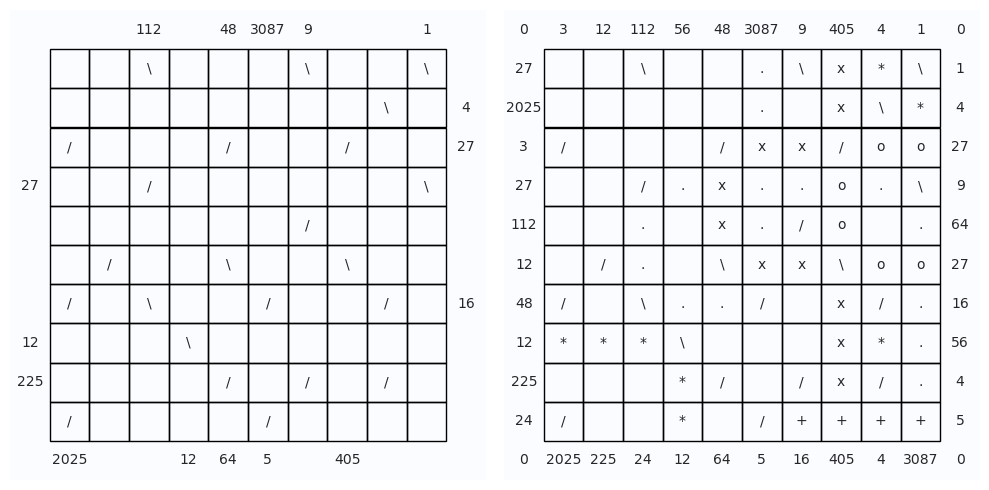

In [5]:
grid =  np.array([[0, 0, 1, 0, 0, 4, 1, 3, 5, 1],
                  [0, 0, 0, 0, 0, 4, 0, 3, 1, 5],
                  [2, 0, 0, 0, 2, 3, 3, 2, 7, 7],
                  [0, 0, 2, 4, 3, 4, 4, 7, 4, 1],
                  [0, 0, 4, 0, 3, 4, 2, 7, 0, 4],
                  [0, 2, 4, 0, 1, 3, 3, 1, 7, 7],
                  [2, 0, 1, 4, 4, 2, 0, 3, 2, 4],
                  [5, 5, 5, 1, 0, 0, 0, 3, 5, 4],
                  [0, 0, 0, 5, 2, 0, 2, 3, 2, 4],
                  [2, 0, 0, 5, 0, 2, 6, 6, 6, 6]])

n = grid.shape[0]+1
sol_print(grid,[path(0,i+1,grid) for i in range(n-1)],[path(i+1,0,grid) for i in range(n-1)],[path(n,i+1,grid) for i in range(n-1)],
          [path(i+1,n,grid) for i in range(n-1)])



In [6]:
factorint(3087)

{3: 2, 7: 3}

Show Puzzle The unique placement of mirrors that satisfies all the provided clue numbers (in black) is shown above. The missing clue numbers are in red. Clockwise from the top they sum to 480, 166, 3356, and 2251. This gives a product of 601,931,086,080 . Congrats to this month’s solvers! Who We Are What We Do The Latest Culture

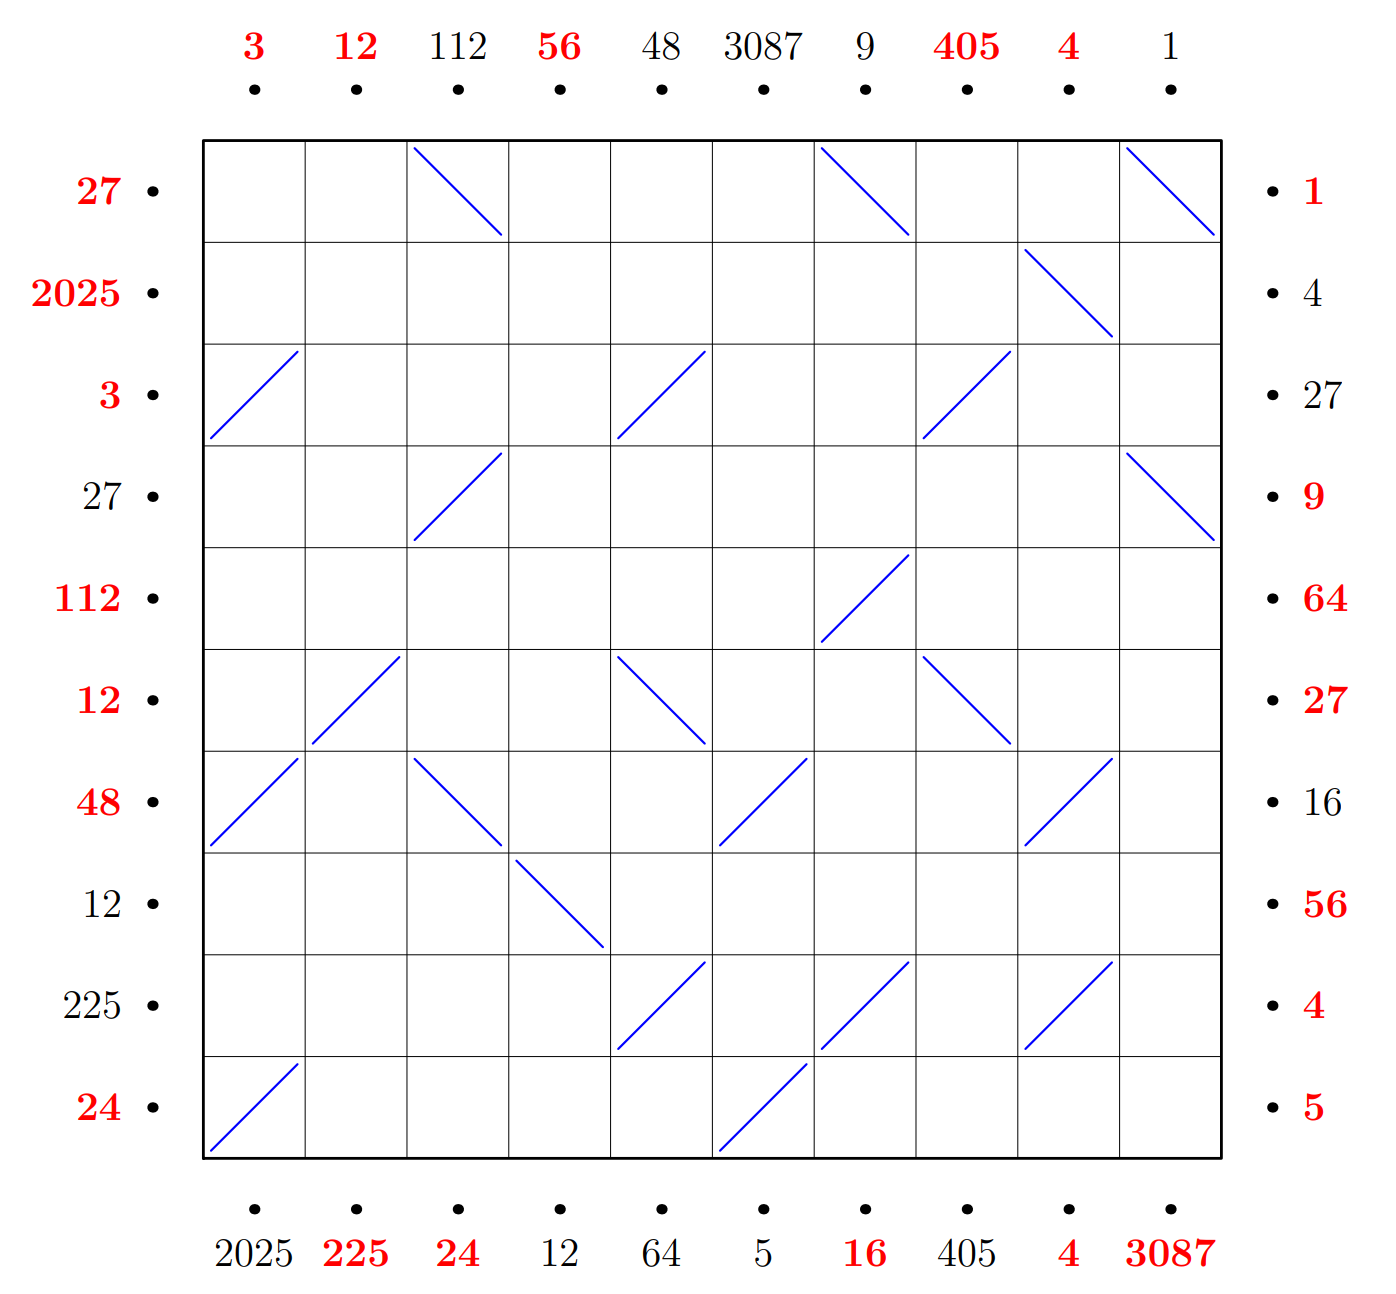

In [17]:
url='https://www.janestreet.com/puzzles/hall-of-mirrors-3-solution/'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
x =[text for text in soup.body.stripped_strings]
#display([(i,j) for i,j in enumerate(x)])
display(Markdown(" ".join(x[15:26])))
display(Image('https://www.janestreet.com/puzzles/mirrors-3-sol.png',width=400))